In [1]:
from importlib import reload
import ebola2opt
reload(ebola2opt)
from ebola2opt import *
import pandas as pd
import numpy as np
from scipy.optimize import fmin_cobyla
import time
%matplotlib

Using matplotlib backend: Qt5Agg


In [55]:
#Constriccions
lims = [c_l,c_u,k_l,k_u,sigma_l,sigma_u,mu_l,mu_u] = [1,2.5,0.1,0.4,1.5,2.5,0.002,0.01]


In [56]:
dades1 = pd.read_csv("Dades_polinomis/take1_hr.csv")
def fitness(v, dades_take=dades1):
    #[c,k,sigma,mu] = v
    return distancia_acc(calcula(dades_take, *v))
def fitness1(v):
    return fitness(v)
def constrc1(v):
    return v[0]-c_l
def constrc2(v):
    return c_u-v[0]
def constrk1(v):
    return v[1]-k_l
def constrk2(v):
    return k_u-v[1]
def constrsigma1(v):
    return v[2]-sigma_l
def constrsigma2(v):
    return sigma_u-v[2]
def constrmu1(v):
    return v[3]-mu_l
def constrmu2(v):
    return mu_u-v[3]
constr = [constrc1, constrc2, constrk1, constrk2, constrsigma1, constrsigma2, constrmu1, constrmu2]

In [58]:
a = pd.Series.as_matrix(dades1)

In [63]:
np.set_printoptions(threshold=np.nan)
print(repr(a))

array([[  9.72222222e-01,  -3.48564141e-01,   1.95905034e-01,
          6.21509156e-01,   3.49657255e-01,   1.39862772e+00,
         -1.00748253e+00],
       [  9.77777778e-01,  -3.45089736e-01,   1.97831959e-01,
          6.29275111e-01,   3.44023270e-01,   1.39703145e+00,
         -1.02086597e+00],
       [  9.83333333e-01,  -3.41572214e-01,   1.99727374e-01,
          6.37030772e-01,   3.38313036e-01,   1.39491887e+00,
         -1.03493154e+00],
       [  9.88888889e-01,  -3.38011641e-01,   2.01590845e-01,
          6.44773216e-01,   3.32522777e-01,   1.39227007e+00,
         -1.04967403e+00],
       [  9.94444444e-01,  -3.34408098e-01,   2.03421916e-01,
          6.52499410e-01,   3.26648750e-01,   1.38906561e+00,
         -1.06508662e+00],
       [  1.00000000e+00,  -3.30761683e-01,   2.05220113e-01,
          6.60206215e-01,   3.20687256e-01,   1.38528658e+00,
         -1.08116092e+00],
       [  1.00555556e+00,  -3.27072515e-01,   2.06984940e-01,
          6.67890386e-01,   3.14

In [38]:
xinicial = [1.68, 0.18, 1.8, 0.0055]
temps = []
resultats = []
for i in range(100):
    t0 = time.clock()
    z = fmin_cobyla(fitness1, xinicial, constr, maxfun = i, disp=3)
    t1 = time.clock()
    print(i, fitness1(z), t1-t0)
    temps.append(t1-t0)
    resultats.append(fitness1(z))


COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
0 0.91192813566 0.5658119781959954
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
1 0.91192813566 0.4696711468836199
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
2 0.91192813566 1.1328863379644822
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
3 0.91192813566 1.3212516594793655
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
4 0.91192813566 1.7684909318018143
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
5 0.91192813566 2.459113869715708
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
6 0.91192813566 3.1600296547981017
COBYLA failed to find a solution: Maximum number of function evaluations has been exceeded.
7 0.91192813566 3.85

KeyboardInterrupt: 

In [39]:
temps

[0.5658119781959954,
 0.4696711468836199,
 1.1328863379644822,
 1.3212516594793655,
 1.7684909318018143,
 2.459113869715708,
 3.1600296547981017,
 3.857047814135896,
 4.310348449914969,
 5.335945032368521,
 5.485812847554897,
 6.268290194416423,
 6.896939313315144,
 9.477498395610226,
 10.233560513718658,
 8.215230926476991,
 7.010265075981366,
 13.083424646204122,
 14.514784232968879,
 12.808634786551266,
 13.614523847903257,
 13.974155891747927,
 17.2073463242117,
 17.924196129783212,
 19.941362949493282,
 15.853684481883192,
 15.826105881877083,
 16.458000607343763,
 16.99688781587463,
 19.075389717295366,
 18.483935273814836,
 19.124245876431473,
 21.07373189816667,
 21.537796283852913,
 25.27361079164183,
 25.88247716574506,
 26.4023157547756,
 27.203632229790912,
 26.60737759698327,
 27.64834855013271,
 27.537153320498305,
 26.216238537593426,
 29.106254976928767]

In [40]:
plt.plot(temps)

In [21]:
complete_show(calcula(dades1, 1.73606075,  0.19233592,  1.00590402,  0.01086953))

In [42]:
list(range(10))+1

TypeError: can only concatenate list (not "int") to list

In [50]:
from numpy import polyfit, polyval, array
x = array(range(len(temps)))+1
z = polyfit(x, temps, 4, rcond=None, full=False, w=None, cov=False)

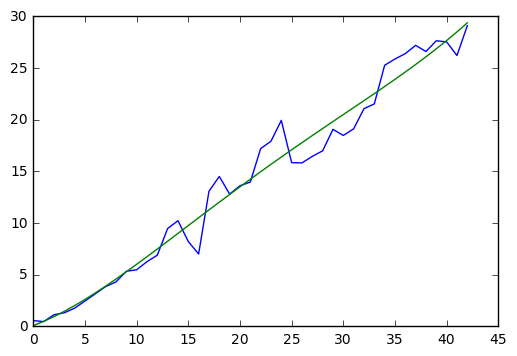

In [51]:
%matplotlib inline
plt.plot(temps)
plt.plot(polyval(z,x))

In [52]:
polyval(z,100)

441.1199123407863

In [53]:
z

array([  1.15534937e-05,  -1.08686131e-03,   3.41861912e-02,
         3.10294000e-01,  -2.59457121e-01])